# ECE-GY 5373 Lab 4 Report (gk1675)

In [1]:
run ../styles.ipynb

## 5.5 Using iperf3

Before doing any experiment.

Romeo

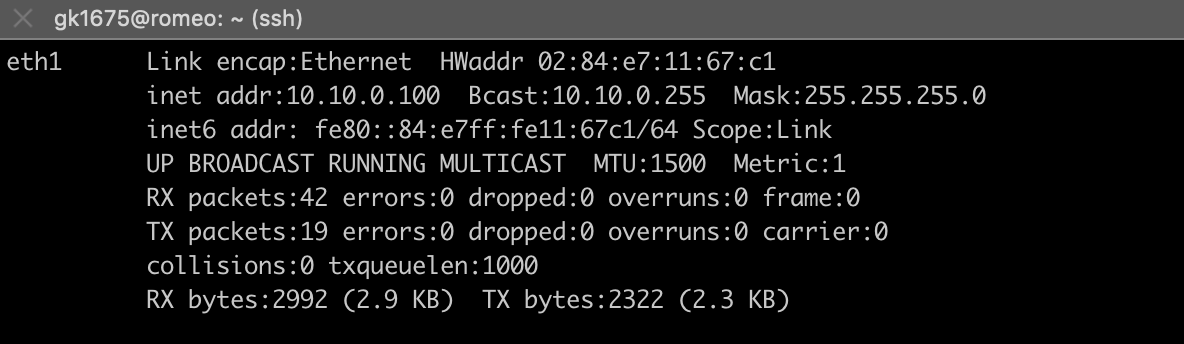

Juliet

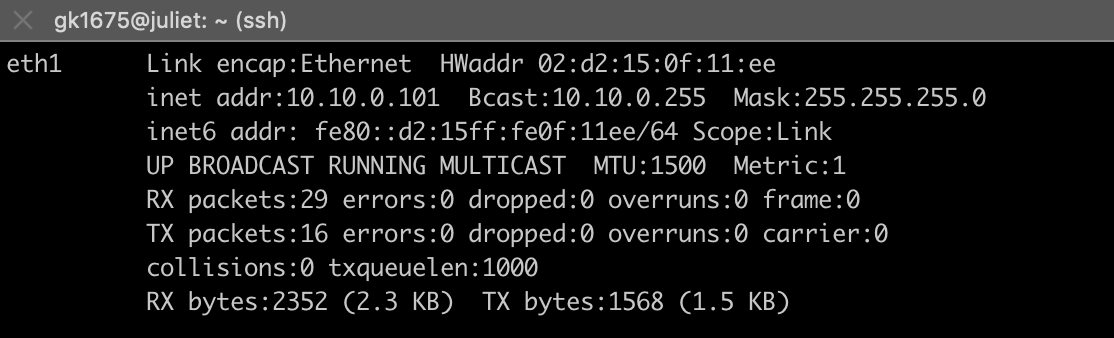

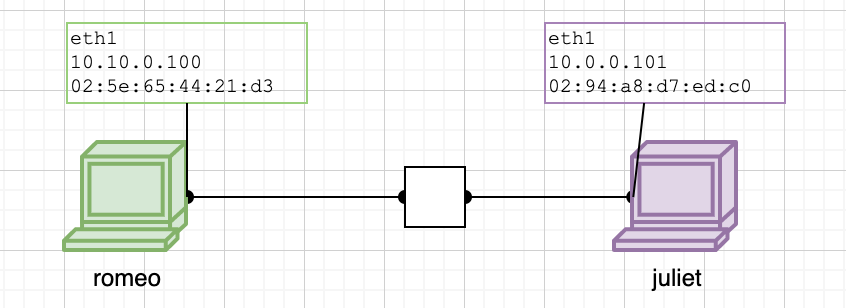

Log into hosts:
- "romeo": `ssh gk1675@pc1.lan.sdn.uky.edu -p 27211`
- "juliet": `ssh gk1675@pc1.lan.sdn.uky.edu -p 27210`   

Copy files:
- `scp -i ~/.ssh/id_rsa -P 27211 gk1675@pc1.lan.sdn.uky.edu:/users/gk1675/romeo-ip-fragment.pcap .`

## Exercise 1

Q:  
- What error would you see if you try to run the iperf3 server when there is already an iperf3 server running on that host and port? 

When trying to run `iperf3 -s` on a second terminal of romeo

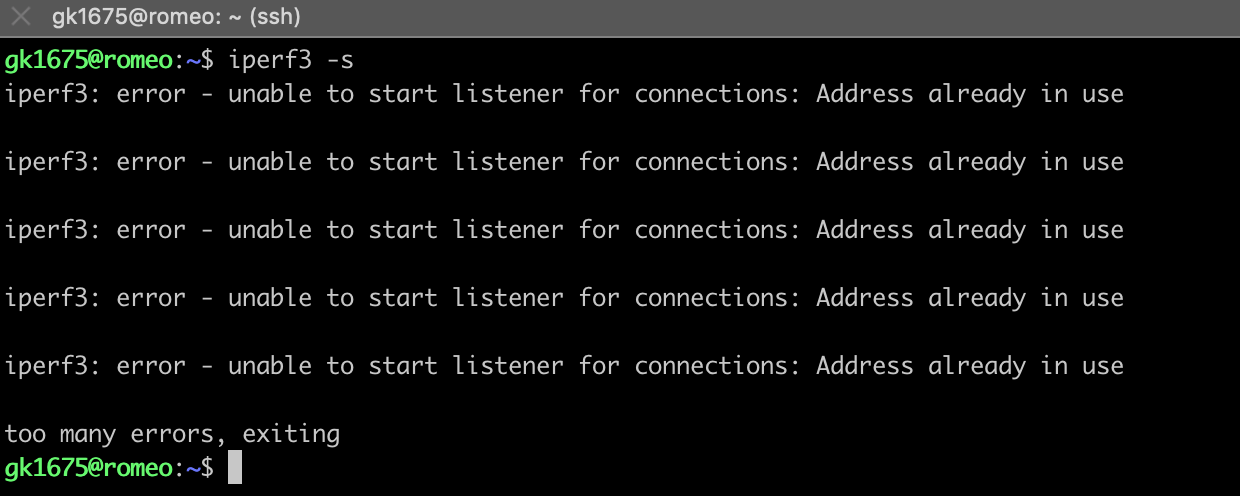

Q:  
- What command can you run to stop an iperf3 server that is running in the background, so that you can start a new server process?

A:  
After running `sudo killall iperf3`, the first server is killed. It is able to run `iperf3 -s` to start a new server process.

When trying to send iperf3 traffic to a wrong address.

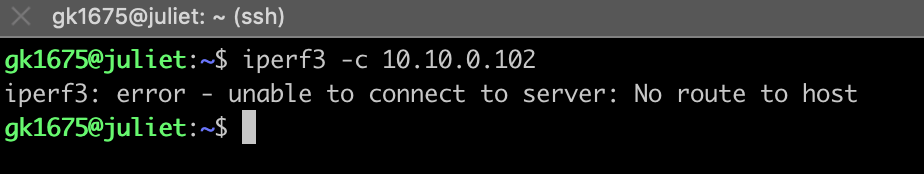

Q:  
- What error would you see if you try to start an iperf3 flow towards a server IP/port where no iperf3 server is currently listening?

A:  
When trying to send iperf3 traffic to a wrong port (no iperf3 server is currently listening).

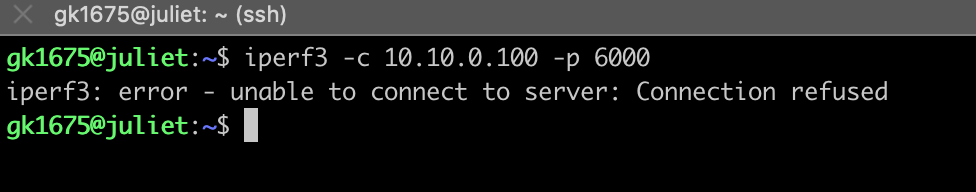

When trying to send iperf3 traffic to a host and port where no iperf3 server is running.

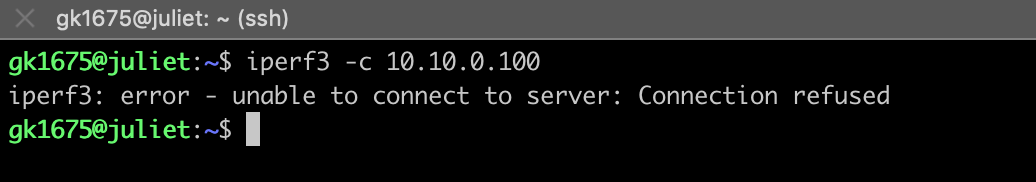

Q:  
What would the following command do?
```
iperf3 -c 10.10.0.100 -u -k 5 -l 500
```

A:  
- `-c 10.10.0.100` means run in client mode to connect to server 10.10.0.100
- `-u` means use UDP rather than tcp
- `-k 5` means send 5 packages (blocks) to transmit
- `-l 500` means lenth of buffer is 500kb

Q: 
Suppose you are not sure if an iperf3 server is running. You want to kill the existing server process if it is running, and start a new one; or, if no server process is running, just start a new one. Explain what steps you would take.   

A:  
run command `sudo killall iperf3 && iperf3 -s || iperf3 -s`.   
In shell script, `&&` will be evaluated before `||`.
- If there exists server process, `sudo killall iperf3 && iperf3 -s` will execute, within which `sudo killall iperf3` will first kill the running server process and then start a new server one with `iperf3 -s`.
- If there is no server running, `sudo killall iperf3 && iperf3 -s` will be skipped and `iperf3 -s` will run and start a new server process.

## 5.6 UDP Exercises with Datagram Sizes

### Exercise 3

the MTU of the eth1 interface on romeo and juliet are both 1500 bytes

Lab report:  
What is the maximum iperf3 payload size (e.g. largest -l argument) that can be sent without IP fragmentation?

A:  
1472 (bytes)

Lab report:   
Explain the maximum iperf3 payload size in terms of MTU and header lengths. What headers are appended to the iperf3 payload, and what size is each header? Describe the total size (including payload + headers) at each layer.

A:  
IP header: 20 bytes, UDP header: 8 bytes.  
MTU: 1500 bytes.  
1500 - 20 - 8 = 1472.  
Data link layer: 1500 bytes  
network layer: 1480 bytes  
transport layer: 1472 bytes

Lab report:  
Explain the tcpdump output for the `iperf3` flow with `-l 2048` in terms of the IP header fields (i.e., id, offset, flags, length) that are used in fragmentation.

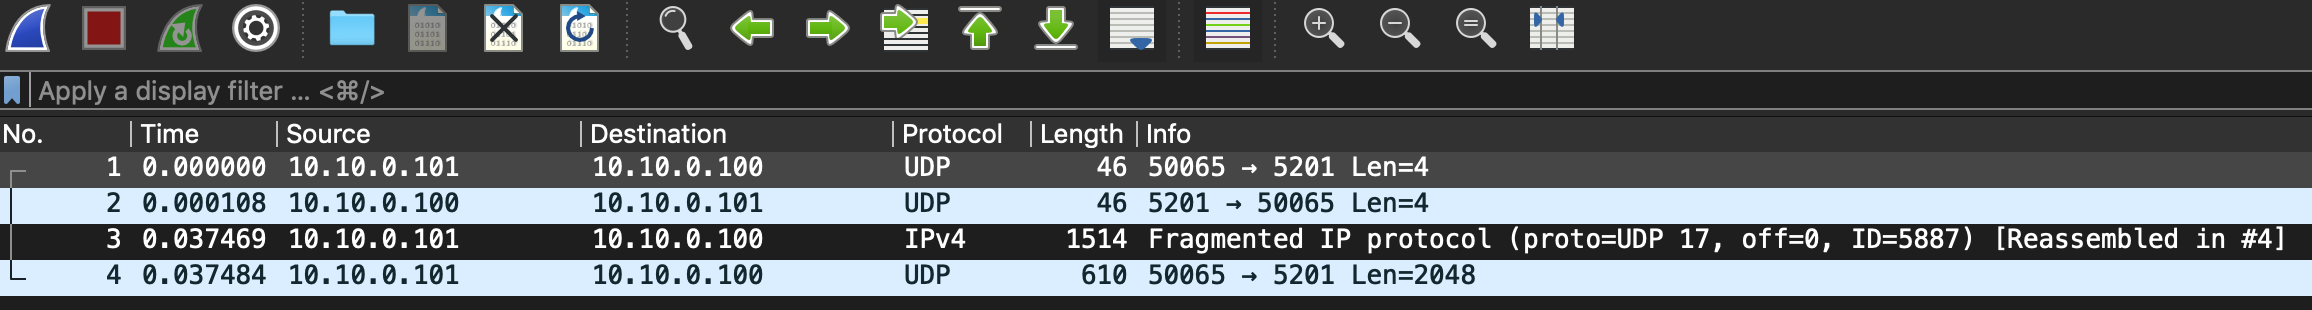

| fragment number | ID | offset | flags | length |
| --- | --- | --- | --- | --- |
| 1 | 22657 | 0 | more fragments | 1500 |
| 2 | 22663 | 1480 | more fragments | 596 |

Lab report:   
When IP fragmentation occurs, only one of the fragments has the UDP header. How do you verify this fact from the tcpdump output?

A:   
The Total length of two fragments is 1500 + 596 = 2096. 2096 - 2048 = 48 (bytes), with subtraction of two IP headers, the remaining 48-20*2 = 8 (bytes) is the same as one UDP header.

### Exercise 4

Lab report:   
- What is the maximum size of the iperf3 UDP payload that the system can send, even when fragmentation is allowed. Explain this value in terms of the header sizes and the "length" header field. (Hint: imagine an interface with a very large MTU, so that there is no IP fragmentation, and the entire payload is sent in a single UDP datagram. How many bits are allocated for the "length" field in the IP header? What is the maximum value that this field can hold? What limitation does this impose on underlying protocol layers?)
    
A:  
The total length is a parameter with 16 bits, meaning that it can at most represent 2^16 - 1 = 65535. Meanwhile, there is also a IPv4 header and a UDP header in the 16 bits, which should be subtracted. Thus, the maximun total length of UDP datagram should be 2^16 - 1 - 20 - 8 = 65507.

## 5.8 Exercises with FTP and TFTP

### Exercise 7

Lab report: Examine the FTP output captured through tcpdump. Identify the starting and ending time of actual data transfer (hint: exclude TCP connection establishment and termination time). Calculate the time spent for data transfer, and the throughput (amount of data transferred divided by transfer time).

Screenshots

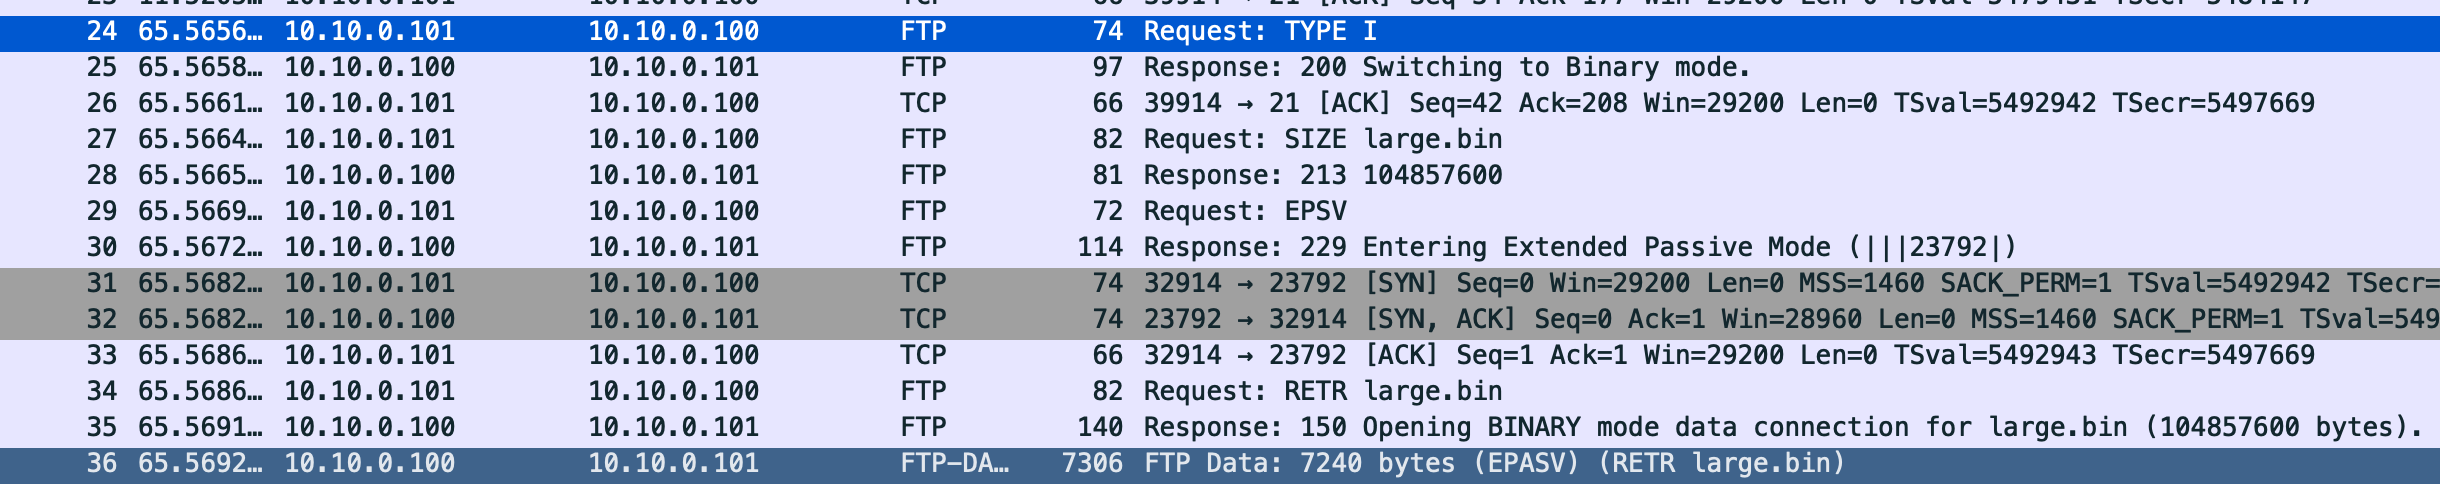

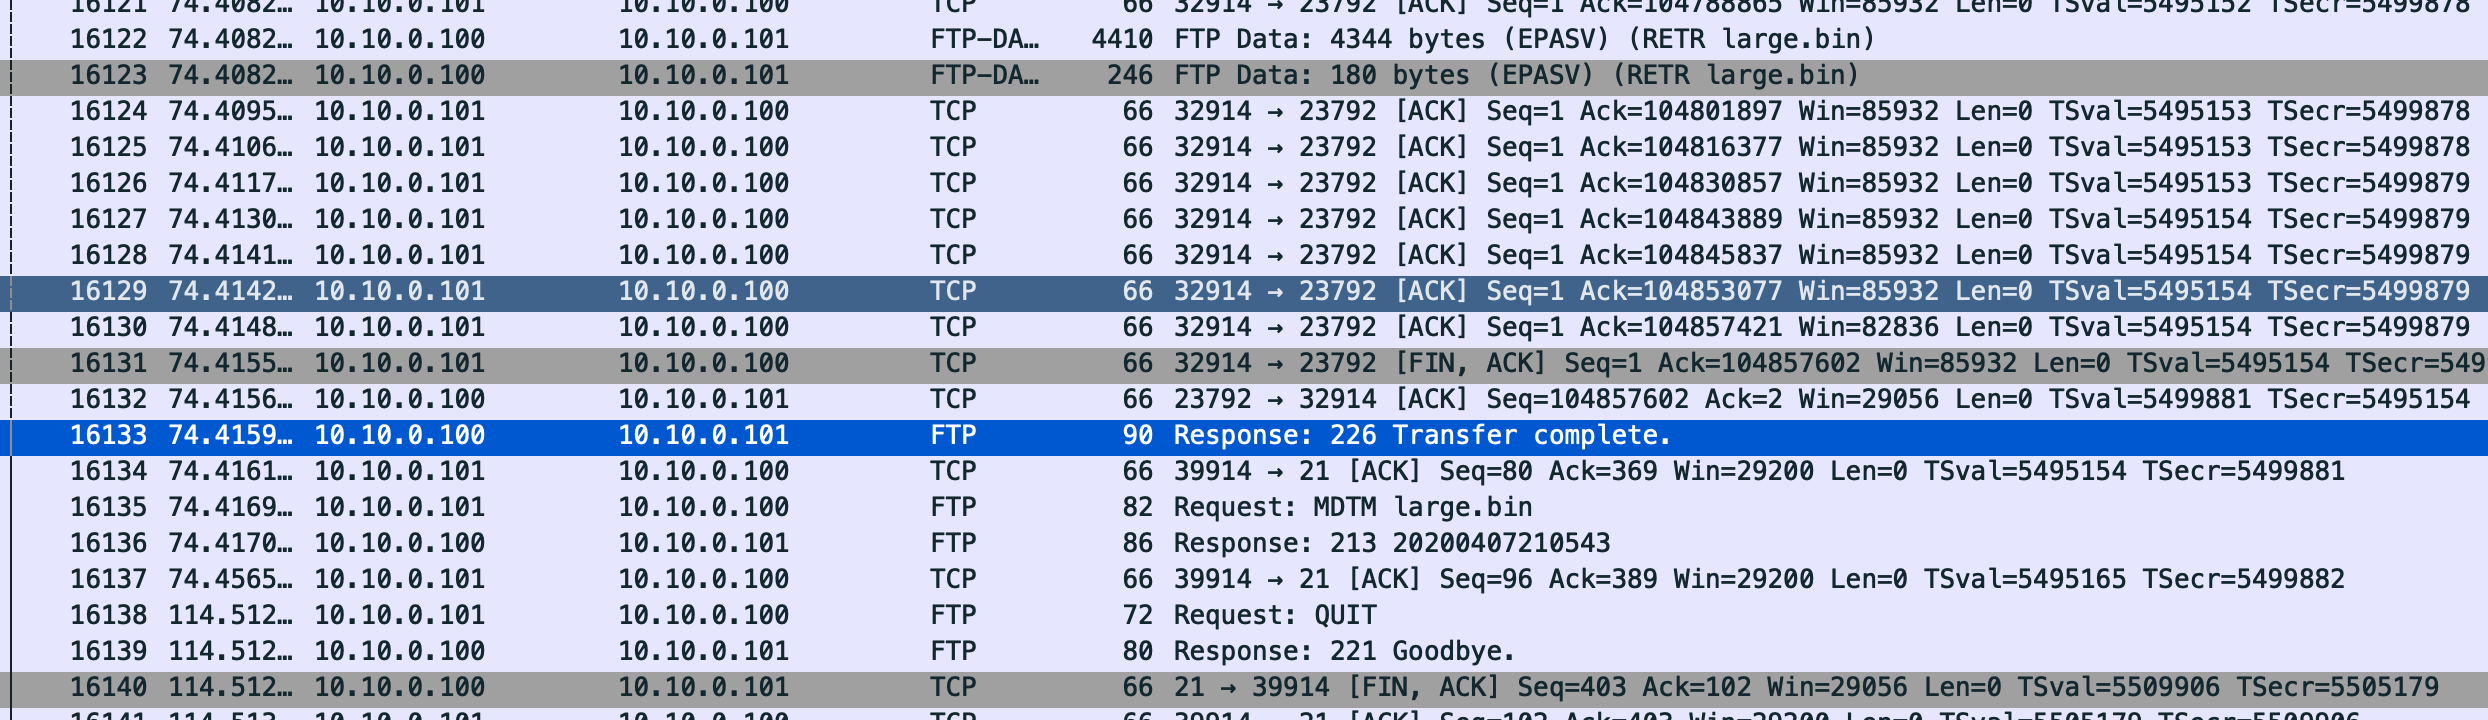

time spent: 73.4 - 65.6 = 7.8 (seconds)   
throughput: 104857600 bytes / 7.8 = 13.4 (MB/s)

Lab report: Examine the TFTP output captured through tcpdump for the file transfer using the default settings. Identify the starting and ending time of actual data transfer. Calculate the time spent for data transfer, and the throughput (amount of data transferred divided by transfer time).

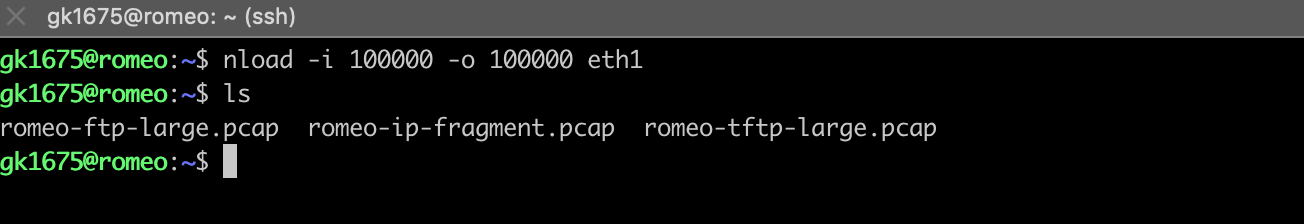

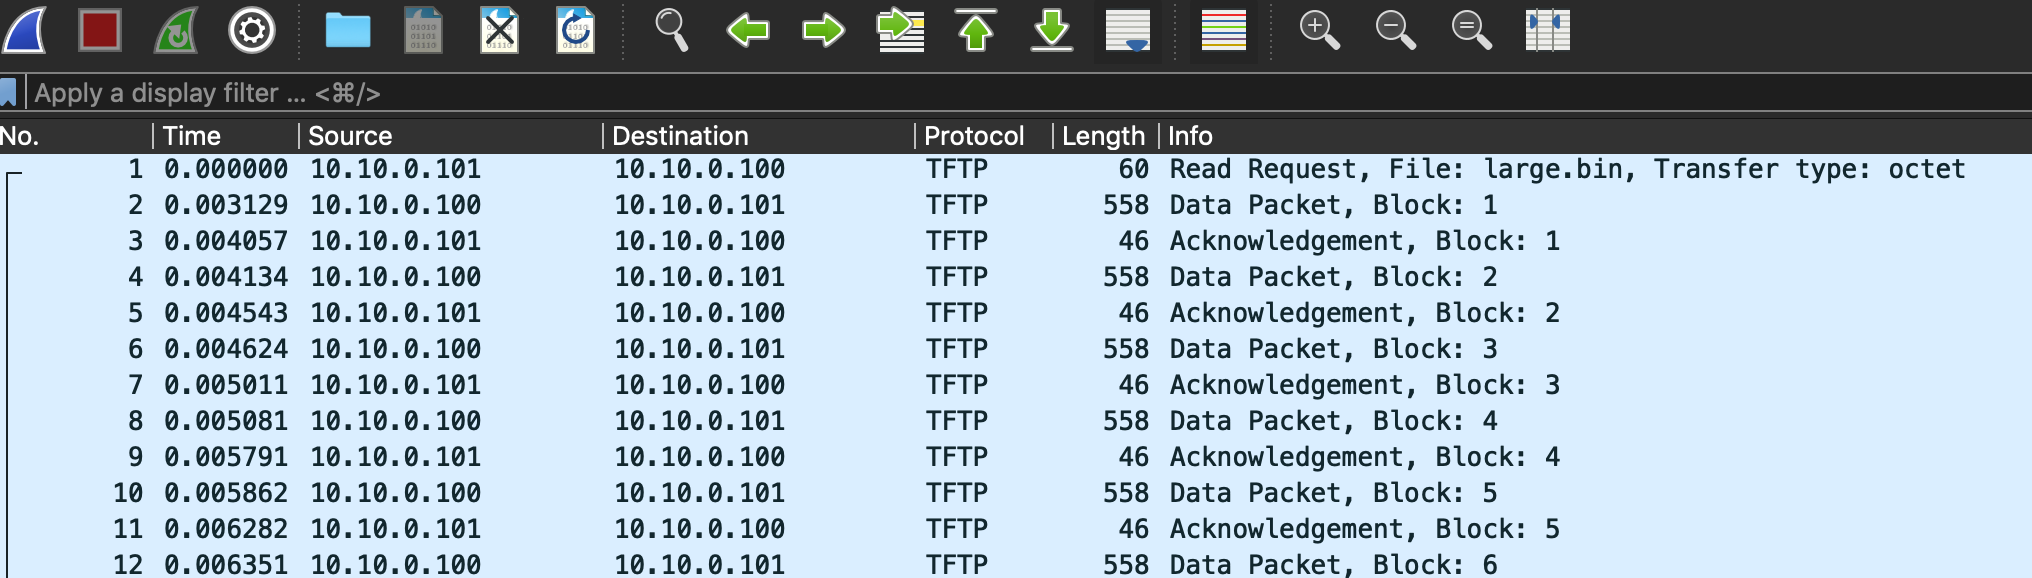

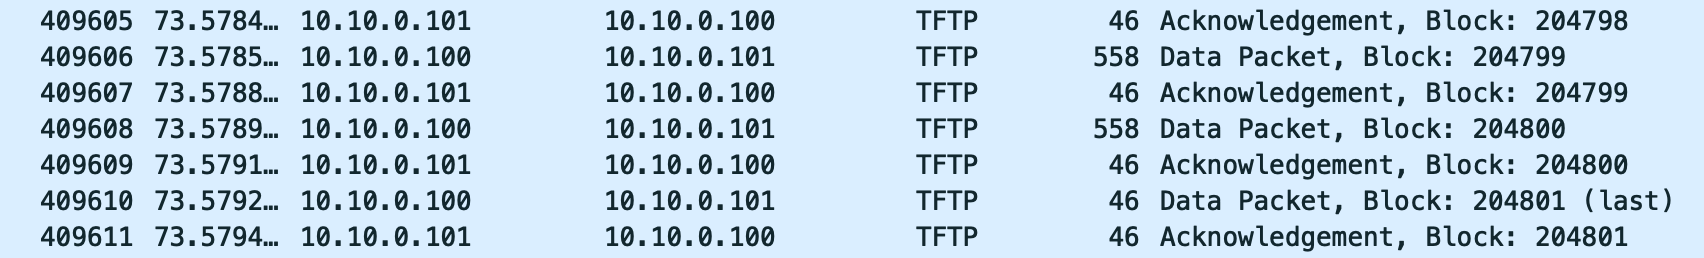

time spent: 73.6 (seconds)   
throughput: 104857600 bytes / 73.6 = 1.4 (MB/s)

Lab report: Compare the time required to transfer the "large" file with the default block size, and with the larger block size. Which of these two is better able to utilize the full 100 Mbps link capacity, and why?

TFTP is way slower than FTP. FTP leverages the TCP acknowledgement system, which includes window size to maximize throughput.    
Instead, TFTP is based on UDP and implements a rudimental acknowledgement system at the appliccation level. Specifically, each piece of data sent requires an acknowledgement. If it doesn't arrive, we do the retransmission. This way, each packet my be acknowledged before the next one can be sent.

### Exercise 8

Lab report: List all the different types of packets exchanged during the TFTP session (note the value of the opcode field for each). Compare them with the TFTP message format in Fig. 5.3 in the textbook.

In order to reduce redundancy, only one example screenshot is shown here.

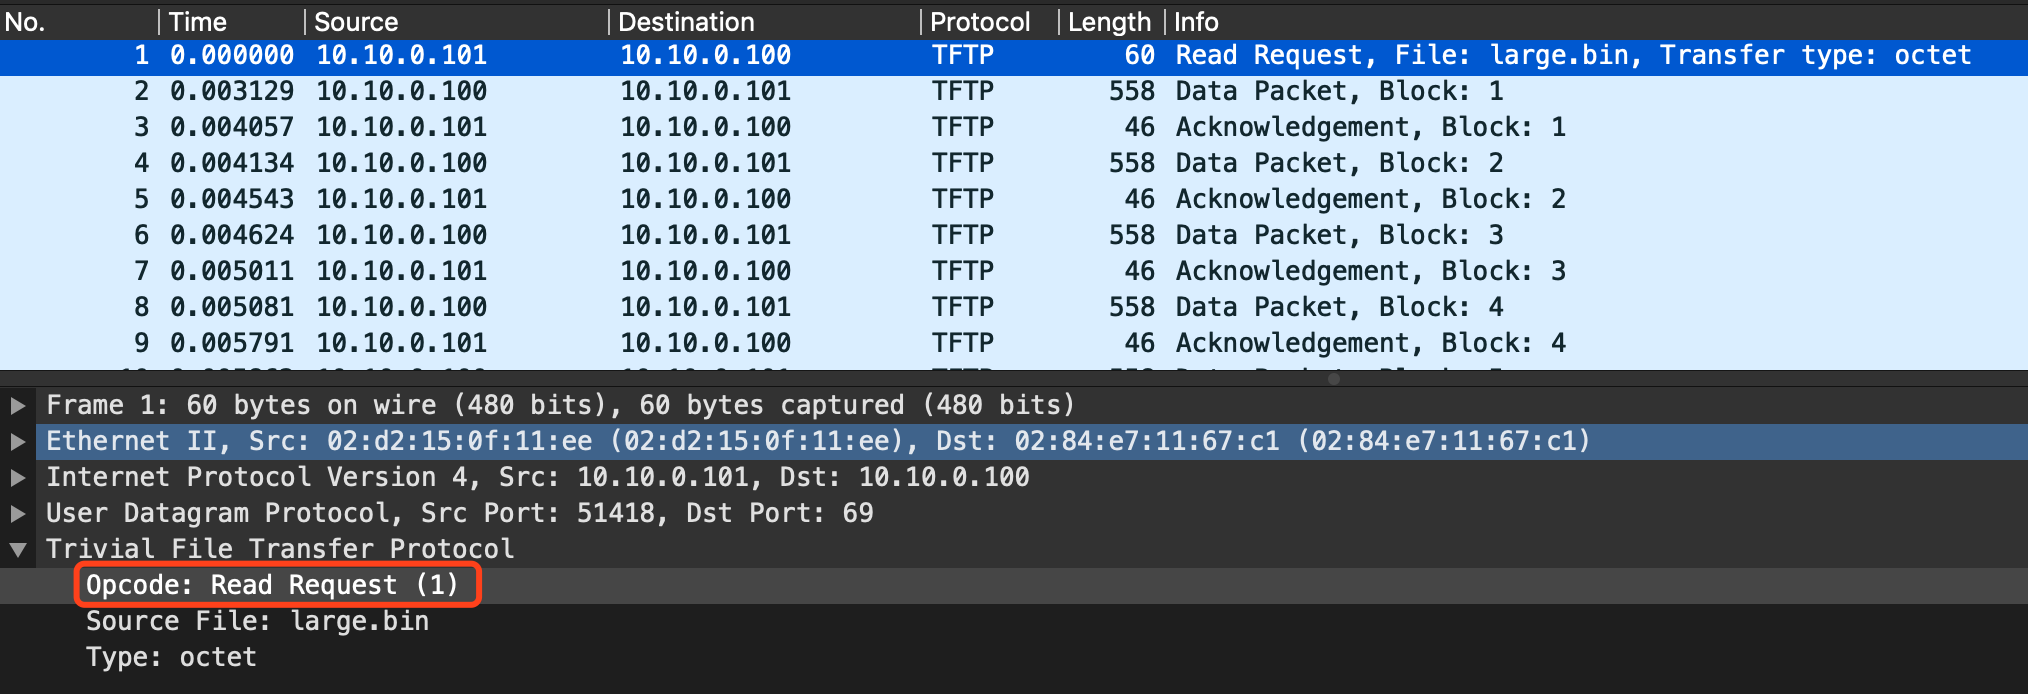

- Read packet (opcode =1) is sent from client to server port 69.
- Data packet (opcode =3) block number starts from 1 and goes on incrementing.
- Acknowledgement packet (opcode =4) The block number of the ack packet corresponds with the earlier data block received.

Lab report: Why does the server's port number change during the TFTP session?

Initially, data transfer is initiated on port 69. However, the data transfer ports are chosen independently by the sender and receiver during initialization of the connection. The ports are chosen at random according to the parameters of the networking stack, typically from the range of Ephemeral ports.

Lab report: In a previous exercise, we found the maximum size of a UDP datagram on this network. With TFTP, which uses UDP, we transferred a file larger than the maximum UDP datagram size. How do you explain this?

In TFTP, the file is broken down into 512 byte data, which is less than the packet size limit in UDP. In this way, files larger than the maximum UDP datagram size can be transferred. 

### Exercise 9

Lab report: How many well-known port numbers were used? Which machine used the well-known port numbers? What were the other port numbers used?

Well-known port number 20 and 21 are used by the server romeo. The FTP client uses a random port 33082 to connect initially to the server and 41754 for data transfer.

Lab report: Based on the tcpdump output, is your FTP session using passive mode or active mode? Explain how you know. What would you expect to see different if the FTP session was using the other mode?

From the tcpdump, it is observed that since FTP is using active mode.   
The client connects from a random port on a file transfer client to port 21 on the server. It sends PORT command specifying what client-side port the server should connect to, which is used for data channel. The server connects from port 20 to the designated client port for the data channel and files are transferred through these ports. The server informs that port 20 is open for active ftp. If it were passive mode, random port would be used for data transfer.

Lab report: As can be seen from the tcpdump output, FTP involves two different connections, ftp-control and ftp-data. Why are two different connections used, instead of one connection?

Control path is used by the client to know file transfer status or it can request to add more files to downloading list without interrupting current file transferring. Thus multiple data streams can be enabled between the server and client.

### Exercise 10

Lab report: How many well-known port numbers were used in the FTP session in passive mode? Which machine used the well-known port numbers? What were the other port numbers used?

Well known port number 21 is used by the server. The FTP server uses a random port 3724 for transfer data. The client uses one random port 10758 for sending commands and another random port 30671 for data transfer.

Lab report: Compare the list of FTP control packets in active and passive mode. What differences are there? Also compare the port numbers used in the FTP sessions in active and passive mode - which parts of each session used well-known port numbers?

In active mode, the response is 200 (EPRT command successful, entering active mode) after 213. In passive mode, response is 229, i.e., extended passive mode. In FTP, the client connects from an ephemeral port to port 21 on server and issues the PASV command.  

Lab report: Explain how the PORT command works (refer to Page 28 of RFC959). Which side sends the PORT command, the server or the client? Our FTP client uses the EPRT command as an updated alternative to PORT (refer to RFC2428). In your session, what are the arguments to the EPRT command and how are these used when establishing the ftp-data session? What is the response to the EPRT command?

Client side sends PORT command. The argument is a HOST-PORT specification for the data port to be used in data connection. the argument is the concatenation of a 32-bit internet host address and a 16-bit TCP port address. This address information is broken into 8-bit fields and the value of each field is transmitted as a decimal number (in character string representation).  The fields are separated by commas.  A port command would be: PORT h1, h2, h3, h4, p1, p2.

Lab report: Explain how the PASV command works (refer to Page 28 of RFC959). Which side sends the PASV command, the server or the client? What is the response to the PASV command, and how are the arguments in this response used when establishing the ftp-data session? Our FTP client uses the EPSV command as an updated alternative to PASV (refer to RFC2428).

Client initiates a command channel connection to the server in passive mode. It sends the PASV command which is a request for a server port to connect to for data transmission. Server returns code 227 indicating that it is entering passive mode. The server replies with the port number that is open for data transfer. 

Lab report: Show the list of FTP control packets for the FTP session using passive mode. Explain each packet.

- The status 220: Service ready for new user is returned.
- Command USER: Asks for new user information. (Anonymous is sent)
- Response 230: which means login is successful.
- Command SYST: Asks for Remote system type
- Response 215: Shows that remote system is UNIX. Binary mode is chosen for file transfer.
- Command FEAT: Get the feature list implemented by the server
- Response 211: Send system status
- Response EPRT: Specifies an extended address and port to which the server should connect
- Command PWD: Asks to Print working directory
- Response 257: Send in response to PWD command. It displays the current working directory on the server for the logged in user.
- Command TYPE I: Sets transfer mode to Binary (TYPE I).
- Response 200: The requested action has been successfully completed. System has switched to binary mode.
- Command SIZE: Asks the size of a file (In this case “small.bin”).
- Response 213: Returns the size of the file as 1024 bytes.
- Command EPSV: Command to Enter extended passive mode.
- Response 229: Server indicated that it has entered Extended Passive Mode
- (|||6365|)—the random ephemeral port that the server will use for data transfer.
- Command RETR: Retrieve a copy of the file small.bin
- Response 150: Response to a command initiating a file transfer before establishing the data connection over which the file transfer will occur. It indicated that the file status is okay and the server is about to open data connection
- Response 226: It indicates that server is closing the data connection and the requested file action was successful.
- Command MDTM: Return the last-modified time of a specified file.
- Response 213: Returns the last-modified time as 20181031155546 (Format of time YYYY/MM/DD/HH/MM/SS).
- Command QUIT: Terminate ftp session and exit
- Response 220: Service closing control connection. (Logged out if appropriate.) last-modified time of a specified file.

---
P.S. Resources on GENI deleted.   
The source code of this notebook is committed to [Guandong Kou's GitHub repository](https://github.com/Kou-Guandong/NYU_5373_Internet_Architecture_and_Protocols)